In [ ]:
# load test datasets
!cp /content/drive/Shareddrives/RAI/tests/datasets.zip /content
!unzip /content/datasets.zip -d /content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. DeepFace


In [ ]:
# pre install
!pip install deepface

In [ ]:
import cv2
from deepface import DeepFace
import numpy as np
from os import walk

emo = ['neutral', 'happy', 'sad', 'surprise', 'anger', 'fear']
total=0
correct=0
for i in emo:
    filenames = next(walk(f'/content/datasets/{i}/'), (None, None, []))[2]
    for j in filenames:
        try:
            path = f"/content/datasets/{i}/{j}"
            img_array = np.fromfile(path, np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            label = DeepFace.analyze(img,actions=['emotion'])['dominant_emotion']
            if label==i : correct+=1
            total+=1
        except:
            continue
    print(i)

print((correct*100)/total)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 91.5MB/s]


neutral
happy
sad
surprise
anger
fear
28.953771289537713


# 2. DAN

In [ ]:
import sys
sys.path.append('/content/drive/Shareddrives/RAI/models/DAN/networks/')
from dan import DAN

import os
import argparse
from os import walk

from PIL import Image

import torch
from torchvision import transforms

In [ ]:
class Model():
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.data_transforms = transforms.Compose([
                                    transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
                                ])
        self.labels = ['neutral', 'happy', 'sad', 'surprise', 'fear', 'disgust', 'anger']

        self.model = DAN(num_head=4, num_class=7, pretrained=False)
        checkpoint = torch.load('/content/drive/Shareddrives/RAI/models/DAN/affecnet7_epoch6_acc0.6569.pth',
            map_location=self.device)
        self.model.load_state_dict(checkpoint['model_state_dict'],strict=True)
        self.model.to(self.device)
        self.model.eval()
    
    def fit(self, path):
        img = Image.open(path).convert('RGB')
        img = self.data_transforms(img)
        img = img.view(1,3,224,224)
        img = img.to(self.device)

        with torch.set_grad_enabled(False):
            out, _, _ = self.model(img)
            _, pred = torch.max(out,1)
            index = int(pred)
            label = self.labels[index]

            return index, label

In [ ]:
model = Model()

emo = ['neutral', 'happy', 'sad', 'surprise', 'anger', 'fear']
total=0
correct=0
for i in emo:
  filenames = next(walk(f'/content/datasets/{i}/'), (None, None, []))[2]
  for j in filenames:
      image = f"./datasets/{i}/{j}"

      index, label = model.fit(image)
      if label==i : correct+=1
      total+=1

print((correct*100)/total)

19.53757225433526


#3. CNN

In [ ]:
!pip install fer

In [ ]:
from fer import FER
import cv2
from os import walk
import numpy as np

In [ ]:
emo = ['angry', 'happy','surprise','sad', 'neutral']

detector = FER(emotion_model="/content/drive/Shareddrives/RAI/model.h5")
for i in emo:
    label_dict = {'neutral': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'angry': 0, 'fear': 0, 'disgust': 0}
    second_label_dict = {'neutral': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'angry': 0, 'fear': 0, 'disgust': 0}
    total=0
    correct=0
    filenames = next(walk(f'./datasets/{i}/'), (None, None, []))[2]
    for k in range(100):
        j=filenames[k]
        path = f"./datasets/{i}/{j}"
        img_array = np.fromfile(path, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        emotions = detector.detect_emotions(img=img)
        if len(emotions):
            emotions = emotions[0]["emotions"]
            sorted_emotions = sorted(emotions.items(), key = lambda item: item[1], reverse=True)
            label = sorted_emotions[0][0]
            if sorted_emotions[0][0] in label_dict.keys():
                label_dict[sorted_emotions[0][0]] += 1
            if sorted_emotions[1][0] in second_label_dict.keys():
                second_label_dict[sorted_emotions[1][0]] += 1
        #label, score = detector.top_emotion(img)
            if label==i : correct+=1
        total+=1
    if total is not 0:
        print(f"{i}: {(correct*100)/total}")
    print(label_dict)
    print(second_label_dict)

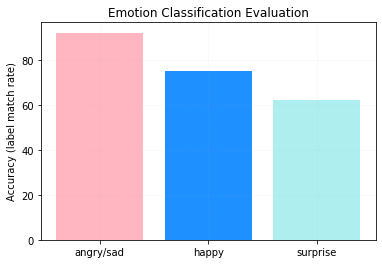

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)
emos = ['angry/sad', 'happy', 'surprise']
values = [92, 75, 62]

plt.bar(x, values, color = ["lightpink", "dodgerblue", "paleturquoise"])
plt.xticks(x, emos)
plt.title("Emotion Classification Evaluation")
plt.ylabel('Accuracy (label match rate)')
plt.grid(alpha=.1, linestyle='--')

In [ ]:
emo = ['neutral', 'happy', 'sad', 'surprise', 'anger', 'fear']
detector = FER()

second_label_dict = {'neutral': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'angry': 0, 'fear': 0}
total=0
correct=0
i = 'anger'
filenames = next(walk(f'./datasets/{i}/'), (None, None, []))[2]
for j in filenames:
    path = f"./datasets/{i}/{j}"
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    emotions = detector.detect_emotions(img=img)
    if len(emotions):
        emotions = emotions[0]["emotions"]
        sorted_emotions = sorted(emotions.items(), key = lambda item: item[1], reverse=True)
        label = sorted_emotions[0][0]
        if sorted_emotions[1][0] in second_label_dict.keys():
                second_label_dict[sorted_emotions[1][0]] += 1
        #label, score = detector.top_emotion(img)
        if label=='angry' : correct+=1
    total+=1
if total is not 0:
    print(f"{i}: {(correct*100)/total}")
print(second_label_dict)

{'neutral': 0, 'happy': 0, 'sad': 0, 'surprise': 0, 'angry': 0, 'fear': 0}


#4. FineTuning CNN

In [ ]:
!pip install tensorflow
!pip install fer

In [ ]:
import pkg_resources
import cv2
import numpy as np
from os import walk
from fer import FER
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
import tensorflow as tf
from PIL import Image
from tensorflow import keras

In [ ]:
model_path =   "/content/drive/Shareddrives/RAI/model.h5"
base_model = load_model(model_path, compile = False)

In [ ]:
base_model.trainable = True

In [ ]:
#If you want to see model layers
base_model.summary()

In [ ]:
# 기존 모델에 argmax layer가 추가된 새로운 모델
inputs = tf.keras.Input(shape=(64, 64, 1))
x = base_model(inputs, training = False)
outputs = tf.keras.layers.Lambda(lambda x: tf.expand_dims(tf.keras.backend.cast(tf.math.argmax(x, axis=1), dtype='float32'),1))(x)
new_model = tf.keras.Model(inputs, outputs)

base_model.trainable = True

new_model.compile(optimizer=keras.optimizers.Adam(1e-10),  # Very low learning rate
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
new_model.summary()

In [ ]:
# functions for preprocessing (image -> tensor)
def __preprocess_input(x):
  x = x.astype("float32")
  x = x / 255.0
  x = x - 0.5
  x = x * 2.0
  return x

def __check_image(path):
  img_array = np.fromfile(path, np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  is_exact_image = is_base64_img = is_url_img = False
  if type(img).__module__ == np.__name__:
      is_exact_image = True
  elif img is None:
      raise InvalidImage("Image not valid.")
  elif len(img) > 11 and img[0:11] == "data:image/":
      is_base64_img = True
  elif len(img) > 11 and img.startswith("http"):
      is_url_img = True

  if is_base64_img:
      img = loadBase64Img(img)
  elif is_url_img:
      img = pil_to_bgr(Image.open(requests.get(img, stream=True).raw))
  elif not is_exact_image:  # image path passed as input
      if not os.path.isfile(img):
          raise ValueError(f"Confirm that {img} exists")
      img = cv2.imread(img)
  return img

def __gray_img_to_face(face_coordinates, gray_img):
  x, y, width, height = face_coordinates
  x_off, y_off = (10, 10)
  x1 = x - x_off
  x2 = x + width + x_off
  y1 = y - y_off
  y2 = y + height + y_off

  x1 += PADDING
  y1 += PADDING
  x2 += PADDING
  y2 += PADDING
  x1 = np.clip(x1, a_min=0, a_max = None)

  gray_face = gray_img[max(0, y1) : y2, max(0, x1) : x2]
  return gray_face


def processImage(path, detector):
  gray_faces=[]
  img = __check_image(path)
  emotion_labels = FER._get_labels()
  face_rectangles = detector.find_faces(img, bgr=True)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_img = FER.pad(gray_img)
  for face_coordinates in face_rectangles:
    face_coordinates = FER.tosquare(face_coordinates)
    gray_face = __gray_img_to_face(face_coordinates, gray_img)
    gray_face = cv2.resize(gray_face, (64, 64))
    gray_face = __preprocess_input(gray_face)
    gray_faces.append(np.array(gray_face))
  return gray_faces

In [ ]:
#preprocessing image
PADDING = 40
emo={0: "angry",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral"}
detector = FER()
faces = {}
for i in emo:
    total=0
    correct=0
    face = []
    filenames = next(walk(f'./datasets/{emo[i]}/'), (None, None, []))[2]
    print(len(filenames))
    for n in range(100):      
        j = filenames[n]
        gray_faces = []
        path = f"./datasets/{emo[i]}/{j}"
        img = __check_image(path)
        emotion_labels = FER._get_labels()
        face_rectangles = detector.find_faces(img, bgr=True)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_img = FER.pad(gray_img)
        for face_coordinates in face_rectangles:
          face_coordinates = FER.tosquare(face_coordinates)
          gray_face = __gray_img_to_face(face_coordinates, gray_img)
          gray_face = cv2.resize(gray_face, (64, 64))
          gray_face = __preprocess_input(gray_face)

        gray_faces.append(gray_face)
        face.append(np.array(gray_faces))
        total += 1
        if total%100==0 : print(total)
    faces[i] = face

In [ ]:
# prepare datasets
renamed_faces = {'input_1': [], 'label': []}
for emo, images in faces.items():
    renamed_faces['input_1'].append(images)
    renamed_faces['label'].append([emo]*len(images))
features = tf.constant(renamed_faces['input_1'])
print(features.shape)
features=tf.reshape(features, [500,1,64,64,1])
labels = tf.constant(renamed_faces['label'])
labels=tf.reshape(labels, [500,1])
features_dataset = tf.data.Dataset.from_tensor_slices(features)
labels_dataset = tf.data.Dataset.from_tensor_slices(labels)
dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))

In [ ]:
!cp drive/Shareddrives/RAI/training.zip training.zip
!unzip training.zip

In [ ]:
import pickle
with open('training' + '/element_spec', 'rb') as in_:
    es = pickle.load(in_)

df = tf.data.experimental.load(
    'training', es, compression='GZIP'
)

In [ ]:
#unzip and prepare x,y for model input
i0= df.map(lambda x,y: x)
t0 = df.map(lambda x,y: y)
t1 = list(t0)
i1 = list(i0)
tsi=tf.convert_to_tensor(i1[0:6000]+i1[24000:30000])
tsi=tf.reshape(tsi, [12000,64,64,1])
tst=tf.convert_to_tensor(t1[0:12000])
tst=tf.reshape(tst, [12000,1])

In [ ]:
base_model.compile(optimizer=keras.optimizers.Adam(1e-6),  # Very low learning rate
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#Finetune fer by model.fit
from keras.callbacks import ReduceLROnPlateau, CSVLogger, ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping('val_loss', patience=50)
model_checkpoint = ModelCheckpoint('fer'+'.{val_accuracy:.2f}.hdf5', 'val_loss', verbose=1,save_best_only=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(50/4), verbose=1)
base_model.fit(x=tsi.numpy(), y=tst.numpy(), epochs=1)

375/375 [==============================] - 160s 424ms/step - loss: 0.2429 - accuracy: 0.9342


In [ ]:
base_model.save("new1.h5")

#5. backend server


In [ ]:
!pip install fer
!pip install pyngrok==4.1.1
!pip install flask-ngrok
!pip install pytube
!pip install flask_cors
!pip install flask-sock
!ngrok authtoken 29I9G3TTcFRuHAYBVnjDeeePiZ5_4QCWkaBqkFfK627DSavxU

In [ ]:
from pytube import YouTube
def downloadYouTube(videourl, path):

    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    yt.download(output_path=path, filename='test.mp4')

In [ ]:
#extend fer video object to handle websocket
#ref: https://github.com/justinshenk/fer/blob/master/src/fer/classes.py

import csv
import logging
import os
import re
from pathlib import Path
from typing import Optional, Union
from zipfile import ZipFile

import base64
import cv2
import pandas as pd
from fer import Video
from tqdm import tqdm
from tqdm.contrib.logging import logging_redirect_tqdm

class fVideo(Video):

  def fanalyze(
        self,
        socket, #for websocket connection
        detector,  # fer.FER instance
        display: bool = False,
        output: str = "csv",
        frequency: Optional[int] = None,
        max_results: int = None,
        save_fps: Optional[int] = None,
        video_id: Optional[str] = None,
        save_frames: bool = True,
        save_video: bool = True,
        annotate_frames: bool = True,
        zip_images: bool = True,
        detection_box: Optional[dict] = None,
    ) -> list:
        """Recognize facial expressions in video using `detector`.
        Args:
            detector (fer.FER): facial expression recognizer
            display (bool): show images with cv2.imshow
            output (str): csv or pandas
            frequency (int): inference on every nth frame (higher number is faster)
            max_results (int): number of frames to run inference before stopping
            save_fps (bool): inference frequency = video fps // save_fps
            video_id (str): filename for saving
            save_frames (bool): saves frames to directory
            save_video (bool): saves output video
            annotate_frames (bool): add emotion labels
            zip_images (bool): compress output
            detection_box (dict): dict with bounding box for subimage (xmin, xmax, ymin, ymax)
        Returns:
            data (list): list of results
        """
        frames_emotions = []
        if frequency is None:
            frequency = 1
        else:
            frequency = int(frequency)

        self.display = display
        self.save_frames = save_frames
        self.save_video = save_video
        self.annotate_frames = annotate_frames

        results_nr = 0

        # Open video
        assert self.cap.open(self.filepath), "Video capture not opening"
        self.__emotions = detector._get_labels().items()
        self.cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        pos_frames = self.cap.get(cv2.CAP_PROP_POS_FRAMES)
        assert int(pos_frames) == 0, "Video not at index 0"

        self.frameCount = 0
        height, width = (
            int(self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
            int(self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        )

        fps = self.cap.get(cv2.CAP_PROP_FPS)
        length = self.cap.get(cv2.CAP_PROP_FRAME_COUNT)
        assert fps and length, "File {} not loaded".format(self.filepath)

        if save_fps is not None:
            frequency = fps // save_fps
        print("{:.2f} fps, {} frames, {:.2f} seconds".format(fps, length, length / fps))

        if self.save_frames:
            os.makedirs(self.outdir, exist_ok=True)
        root, ext = os.path.splitext(os.path.basename(self.filepath))
        outfile = os.path.join(self.outdir, f"{root}_output{ext}")

        if save_video:
            self.videowriter = self._save_video(outfile, fps, width, height)
        total=int(length/fps)

        while self.cap.isOpened():
            ret, frame = self.cap.read()
            if not ret:  # end of video
                break

            if frame is None:
                continue

            if int(self.frameCount % fps) != 0:
                self.frameCount += 1
                continue

            if detection_box is not None:
                frame = self._crop(frame, detection_box)

            # Get faces and detect emotions; coordinates are for unpadded frame
            try:
                faces = detector.detect_emotions(frame)
            except Exception as e:
                print("error")                

            # Offset detection_box to include padding
            if detection_box is not None:
                faces = self._offset_detection_box(faces, detection_box)
            img = os.path.join(self.outdir, (video_id or root) + str(self.frameCount) + ".jpg")
            self._increment_frames(frame, faces, video_id, root)
            
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break

            if faces:
                for f in faces:
                  with open(img, 'rb') as ff:
                    img_string = base64.b64encode(ff.read()).decode("utf-8")
                  f['image'] =  img_string
                  f['box'] = f['box'].tolist()
                frames_emotions.append(faces)
            else:
                # in case, model can't find faces: send empty result with image 
                with open(img, 'rb') as ff:
                  img_string = base64.b64encode(ff.read()).decode("utf-8")
                frames_emotions.append([{'box':[],
                                         "emotions":{
                                          'angry':0,
                                         'disgust':0,
                                         'fear':0,
                                         'happy':0,
                                         'sad':0,
                                         'surprise':0,
                                         'neutral':0},
                                         'image': img_string
                                        }])

            socket.send(str(int(100*results_nr//total)))
            results_nr += 1
            if max_results and results_nr > max_results:
                break
        self._close_video(outfile, save_frames, zip_images)
        return frames_emotions


In [ ]:
s = "https://youtube.com/shorts/hLHFOeK8f3E?feature=share"
s=s.replace('/','*')
s

'https:**youtube.com*shorts*hLHFOeK8f3E?feature=share'

In [ ]:
# run backend server (colab)
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request
import shutil 
from flask_sock import Sock
import json

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
sock = Sock(app)
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
#check connection ping-pong
@app.route('/ping', methods=['GET'])
def method():
    if request.method == 'GET':
      response = jsonify('pong!')
      response.headers.add('Access-Control-Allow-Origin', '*')
      return response
#websocket connection
@sock.route('/video')
def handle(sock):
    while True:
        data = sock.receive()
        downloadYouTube(data, '/content/')
        video_filename = "./test.mp4"
        video = fVideo(video_filename)
        shutil.rmtree("/content/output") 
        raw_data = video.fanalyze(socket=sock, detector=detector, save_frames=True, annotate_frames=True, zip_images=False, save_video=False  )
        send_data = { "data": raw_data}
        sock.send(send_data)
        break

app.run()